In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import mglearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

iris=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [6]:
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for c in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=c)
        score=svm.fit(X_train,y_train).score(X_test,y_test)
        if score>best_score:
            best_score=score
            best_params={'C':c,'gamma':gamma}
print('best score: {}'.format(best_score))
print('best parameters: {}'.format(best_params))

best score: 0.9736842105263158
best parameters: {'C': 100, 'gamma': 0.001}


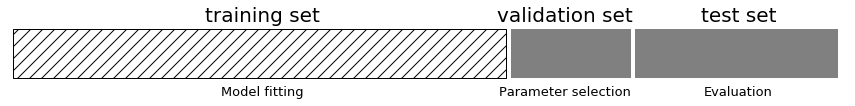

In [9]:
#but we used our test set to tune our model! this can lead to invalid results

#we need to implement a validation set

mglearn.plots.plot_threefold_split()
plt.show()

In [18]:
X_train_val,X_test,y_train_val,y_test=train_test_split(iris.data,iris.target,random_state=0)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_val,y_train_val,random_state=1)

In [19]:
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for c in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=c)
        svm.fit(X_train,y_train)
        score=svm.score(X_valid,y_valid)
        if score > best_score:
            best_score=score
            best_params={'C':c,'gamma':gamma}
            
print('best score on validation set: {}'.format(best_score))
print('best parameters: {}'.format(best_params))

svm=SVC(**best_params)
svm.fit(X_train_val,y_train_val)

print('test set score: {}'.format(svm.score(X_test,y_test)))

best score on validation set: 0.9642857142857143
best parameters: {'C': 10, 'gamma': 0.001}
test set score: 0.9210526315789473


In [20]:
#or use grid search with cv

In [23]:
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for c in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=c)
        svm.fit(X_train_val,y_train_val)
        scores=cross_val_score(svm,X_train_val,y_train_val,cv=5)
        score=np.mean(scores)
        if score > best_score:
            best_score=score
            best_params={'C':c,'gamma':gamma}
            
print('best score on train set: {}'.format(best_score))
print('best parameters: {}'.format(best_params))

svm=SVC(**best_params)
svm.fit(X_train_val,y_train_val)

print('test set score: {}'.format(svm.score(X_test,y_test)))

best score on train set: 0.9726896292113683
best parameters: {'C': 100, 'gamma': 0.01}
test set score: 0.9736842105263158


In [26]:
param_grid={'C':[0.001,.01,.1,1,10,100],'gamma':[0.001,.01,.1,10,100]}

grid_search=GridSearchCV(SVC(),param_grid,cv=5)

In [28]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
print(grid_search.best_params_)
print('train score: {}'.format(grid_search.best_score_))
print('test score: {}'.format(grid_search.score(X_test,y_test)))

{'C': 100, 'gamma': 0.01}
train score: 0.9732142857142857
test score: 0.9736842105263158


In [34]:
print(grid_search.best_estimator_)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [39]:
results=pd.DataFrame(grid_search.cv_results_)
display(results.head())

/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/anaconda3/lib/python3.6/site-packages/sklearn/ut

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000938,0.000314,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",18,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000094,0.000020,0.011371,0.002852
1,0.000932,0.000330,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",18,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000048,0.000016,0.011371,0.002852
2,0.001005,0.000399,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",18,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000052,0.000104,0.011371,0.002852
3,0.001085,0.000379,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",18,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000098,0.000031,0.011371,0.002852
4,0.001157,0.000414,0.366071,0.366079,0.001,100,"{'C': 0.001, 'gamma': 100}",18,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000191,0.000099,0.011371,0.002852


In [44]:
param_grid=[{'kernel':['rbf'],'C':[0.001,.01,.1,1,10,100],'gamma':[0.001,.01,.1,10,100]},
            {'kernel':['linear'],'C':[0.001,.01,.1,1,10,100]}]

grid_search=GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
print(grid_search.best_params_)
print('train score: {}'.format(grid_search.best_score_))
print('test score: {}'.format(grid_search.score(X_test,y_test)))

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
train score: 0.9732142857142857
test score: 0.9736842105263158


In [46]:
results=pd.DataFrame(grid_search.cv_results_)
display(results.T)

/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/root/anaconda3/lib/python3.6/site-packages/sklearn/ut

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.00127678,0.00135875,0.00110736,0.00132251,0.000937271,0.000961733,0.000780964,0.000881672,0.0009202,0.000891399,...,0.000390244,0.000391006,0.00102854,0.00103898,0.000470066,0.000426674,0.000358105,0.000339031,0.00034852,0.000361681
mean_score_time,0.000468206,0.000540686,0.000392246,0.000566339,0.000308228,0.000294876,0.000270653,0.000384188,0.000357819,0.000281382,...,0.000213194,0.000213051,0.00026207,0.00026989,0.000220633,0.000220871,0.000209093,0.000203419,0.000206995,0.000205612
mean_test_score,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,...,0.973214,0.955357,0.919643,0.5625,0.366071,0.848214,0.946429,0.973214,0.964286,0.964286
mean_train_score,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,...,0.984368,0.988788,1,1,0.366079,0.855069,0.966538,0.984368,0.988813,0.993258
param_C,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,10,100,0.001,0.01,0.1,10,100,...,0.01,0.1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
rank_test_score,23,23,23,23,23,23,23,23,23,23,...,1,9,13,20,23,17,10,1,3,3
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,1,0.958333,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333


In [ ]:
#grid search is ideal for parallel computing. Set n_jobs= number of cpu cores you want to split across
#set n_jobs=-1 to use all available cores